# **Stock Price Prediction using Random Forest**

**Introduction:**

This project focuses on predicting the closing prices of Infosys (INFY) stock using historical data and machine learning techniques. The dataset contains essential features such as open, high, low, close prices, volume, and open interest (OI) for INFY stock over a period.

**Objective:**

The main objective of this project is to develop a reliable prediction model that can forecast INFY stock's closing prices accurately. This predictive model can assist investors, traders, and financial analysts in making informed decisions and developing trading strategies.

**Dataset Description:**

The dataset comprises the following columns:


1.   Name: The name of the stock (INFY in this case).
2.   Timestamp: The date and time of the stock data entry.
3.   Open: The opening price of the stock on that particular day.
4.   High: The highest price the stock reached during the day.
5.   Low: The lowest price the stock reached during the day.
6.   Close: The closing price of the stock on that particular day.
7.   Volume: The total number of shares traded on that day.
8.   OI (Open Interest): Open interest refers to the total number of outstanding contracts that have not been settled for an asset.

The dataset spans multiple days, capturing the fluctuations in INFY stock prices and trading volume over time.

## **Code**

In [44]:
import pandas as pd

# Read data into a DataFrame
df = pd.read_excel('INFY.xlsx')

# Converting the 'Timestamp' column to date
df['Timestamp'] = pd.to_datetime(df['Timestamp'])

# Create date-related features
df['Year'] = df['Timestamp'].dt.year
df['Month'] = df['Timestamp'].dt.month
df['Day'] = df['Timestamp'].dt.day

In [45]:
# Three new features are extracted (Year, Month, Date)
df.head()

,Name,Timestamp,Open,High,Low,Close,Volume,OI,Year,Month,Day
0,INFY,2024-05-07 00:00:00+05:30,1424.95,1443.35,1415.60,1440.95,6080661,0,2024,5,7
1,INFY,2024-05-06 00:00:00+05:30,1420.00,1445.70,1417.10,1425.90,6445422,0,2024,5,6
2,INFY,2024-05-03 00:00:00+05:30,1422.10,1424.80,1403.20,1416.30,8842345,0,2024,5,3
3,INFY,2024-05-02 00:00:00+05:30,1413.00,1424.00,1411.85,1414.45,10076354,0,2024,5,2
4,INFY,2024-04-30 00:00:00+05:30,1434.70,1436.55,1417.55,1420.55,6936588,0,2024,4,30


In [46]:
# Define a mapping dictionary for Name column
name_mapping = {'INFY': 0,}

# Mapping the Name column using the defined mapping
df['Name_mapped'] = df['Name'].map(name_mapping)


In [47]:
# Features and Target variable
X = df[['Name_mapped', 'Year', 'Month', 'Day']]  # Features
y = df['Close']  # Target varible


In [48]:
from sklearn.model_selection import train_test_split

# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [49]:
from sklearn.ensemble import RandomForestRegressor

# Initialize the Random Forest model
model = RandomForestRegressor(n_estimators=100, random_state=42)  # You can adjust the number of estimators as needed


In [50]:
# Train the model
model.fit(X_train, y_train)


RandomForestRegressor(random_state=42)

### Generate future dates for the next 30 days (08-05-2024 to 06-06-2024)

In [51]:
from datetime import datetime, timedelta

# Get the last date in the dataset
last_date = df['Timestamp'].max()

# Generate future dates for the next 30 days
future_dates = [last_date + timedelta(days=i) for i in range(1, 31)]

# Create a DataFrame for future dates with the same features
future_df = pd.DataFrame({'Name_mapped': [0] * 30,  # Assuming all mapped to 0 for simplicity
                          'Year': [date.year for date in future_dates],
                          'Month': [date.month for date in future_dates],
                          'Day': [date.day for date in future_dates]})


In [52]:
# Make predictions for future dates
future_predictions = model.predict(future_df)


In [53]:
future_predictions

array([1433.6415, 1434.7195, 1434.534 , 1436.2055, 1436.2195, 1432.687 ,
       1431.376 , 1431.376 , 1424.173 , 1421.368 , 1421.2785, 1418.7185,
       1418.9015, 1419.9565, 1428.4345, 1430.0665, 1430.28  , 1434.218 ,
       1434.406 , 1434.766 , 1430.4515, 1430.4515, 1426.712 , 1426.6565,
       1431.12  , 1423.506 , 1423.1945, 1423.4595, 1428.0865, 1428.0285])

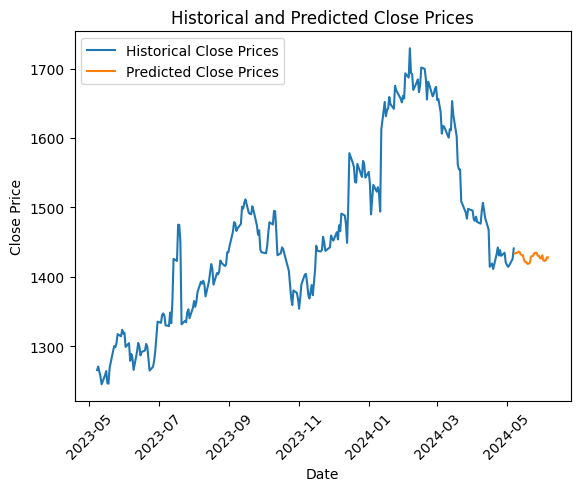

In [54]:
import matplotlib.pyplot as plt

# Plot historical data
plt.plot(df['Timestamp'], df['Close'], label='Historical Close Prices')

# Plot future dates and predicted prices
plt.plot(future_dates, future_predictions, label='Predicted Close Prices', linestyle='-')

# Add labels and title
plt.xlabel('Date')
plt.ylabel('Close Price')
plt.title('Historical and Predicted Close Prices')
plt.legend()

# Rotate x-axis labels for better readability
plt.xticks(rotation=45)

# Show plot
plt.show()


### Evaluation metrics for training dataset

In [55]:
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

# Make predictions for the training set
y_train_predicted = model.predict(X_train)

# Calculate evaluation metrics
mae_train = mean_absolute_error(y_train, y_train_predicted)
mse_train = mean_squared_error(y_train, y_train_predicted)
r2_train = r2_score(y_train, y_train_predicted)

print("Mean Absolute Error (MAE) on training set:", mae_train)
print("Mean Squared Error (MSE) on training set:", mse_train)
print("R-squared (R2) Score on training set:", r2_train)


Mean Absolute Error (MAE) on training set: 5.302804020100351
Mean Squared Error (MSE) on training set: 53.70781052261316
R-squared (R2) Score on training set: 0.9964890203919166


### Evaluation metrics for testing dataset

In [56]:
# Make predictions for the test set
y_test_predicted = model.predict(X_test)

# Calculate evaluation metrics
mae_test = mean_absolute_error(y_test, y_test_predicted)
mse_test = mean_squared_error(y_test, y_test_predicted)
r2_test = r2_score(y_test, y_test_predicted)

print("Mean Absolute Error (MAE) on test set:", mae_test)
print("Mean Squared Error (MSE) on test set:", mse_test)
print("R-squared (R2) Score on test set:", r2_test)


Mean Absolute Error (MAE) on test set: 16.087839999999773
Mean Squared Error (MSE) on test set: 633.0316891899861
R-squared (R2) Score on test set: 0.9490356501268926


**Conclusion:**

The predictive model developed using Random Forest Regression has generated future closing price predictions for Infosys (INFY) stock for the next 30 days. The predicted values are as follows:

[1433.6415, 1434.7195, 1434.534, 1436.2055, 1436.2195, 1432.687,
1431.376, 1431.376, 1424.173, 1421.368, 1421.2785, 1418.7185,
1418.9015, 1419.9565, 1428.4345, 1430.0665, 1430.28, 1434.218,
1434.406, 1434.766, 1430.4515, 1430.4515, 1426.712, 1426.6565,
1431.12, 1423.506, 1423.1945, 1423.4595, 1428.0865, 1428.0285]

These predictions provide insights into potential future price movements of INFY stock, which can be valuable for investors, traders, and financial analysts in formulating their investment strategies and decisions. However, it's essential to note that these predictions are based on historical data and the performance of the predictive model, and actual market conditions may vary. Continuous monitoring and refinement of the model are recommended to improve its accuracy and reliability over time.
